In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
class AntColony:

    def __init__(self, n_ants, n_nodes, n_iterations, alpha, beta, rho, x, y, show):
        self.n_ants = n_ants
        self.n_nodes = n_nodes
        self.n_iterations = n_iterations
        self.alpha = alpha
        self.beta = beta
        self.show = show
        self.rho = rho
        self.x = x
        self.y = y
        self.best_path = None
        self.best_path_length = np.inf
        self.best_path_history = []
        self.pheromone = np.ones((self.n_nodes, self.n_nodes))
        self.distance = np.zeros((self.n_nodes, self.n_nodes))

    def update_pheromone(self, paths):
        self.pheromone = (1 - self.rho) * self.pheromone
        for path in paths:
            for i in range(self.n_nodes):
                self.pheromone[path[i], path[i + 1]] += 1

    def select_next_node(self, current_node, visited_nodes):
        p = np.zeros(self.n_nodes)
        for i in range(self.n_nodes):
            if i not in visited_nodes:
                p[i] = self.pheromone[current_node, i] ** self.alpha * (1 / self.distance[current_node, i]) ** self.beta
        p = p / p.sum()
        return np.random.choice(self.n_nodes, p=p)

    def construct_paths(self):
        paths = np.zeros((self.n_ants, self.n_nodes + 1), dtype=int)
        for i in range(self.n_ants):
            visited_nodes = [0]
            for j in range(self.n_nodes - 1):
                paths[i, j + 1] = self.select_next_node(paths[i, j], visited_nodes)
                visited_nodes.append(paths[i, j + 1])
            paths[i, -1] = 0
        return paths

    def calculate_path_lengths(self, paths):
        path_lengths = np.zeros(self.n_ants)
        for i in range(self.n_ants):
            for j in range(self.n_nodes):
                path_lengths[i] += self.distance[paths[i, j], paths[i, j + 1]]
        return path_lengths

    def solve(self, distance):
        self.distance = distance
        for i in range(self.n_iterations):
            paths = self.construct_paths()
            path_lengths = self.calculate_path_lengths(paths)
            self.update_pheromone(paths)

            if path_lengths.min() < self.best_path_length:
                self.best_path_length = path_lengths.min()
                self.best_path = paths[path_lengths.argmin()].copy()
            self.best_path_history.append(self.best_path_length)
            
            if self.show and i % 10 == 0:
                self.plot_tsp()

        return self.best_path, self.best_path_length, self.best_path_history

    def plot_tsp(self):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        ax1.scatter(self.x, self.y, c='k')
        for i in range(self.n_nodes):
            for j in range(self.n_nodes):
                color = self.pheromone[i, j] / self.pheromone.max()
                ax1.plot([self.x[i], self.x[j]], [self.y[i], self.y[j]], c='r', alpha=color)
        ax1.set_title('Nodes/Pheromones')
        ax2.scatter(self.x, self.y, c='k')
        ax2.plot(self.x[self.best_path], self.y[self.best_path], c='b')
        ax2.set_title('Best path')
        ax3.plot(self.best_path_history)
        ax3.set_title('Best path length: {}'.format(self.best_path_length))
        plt.show()

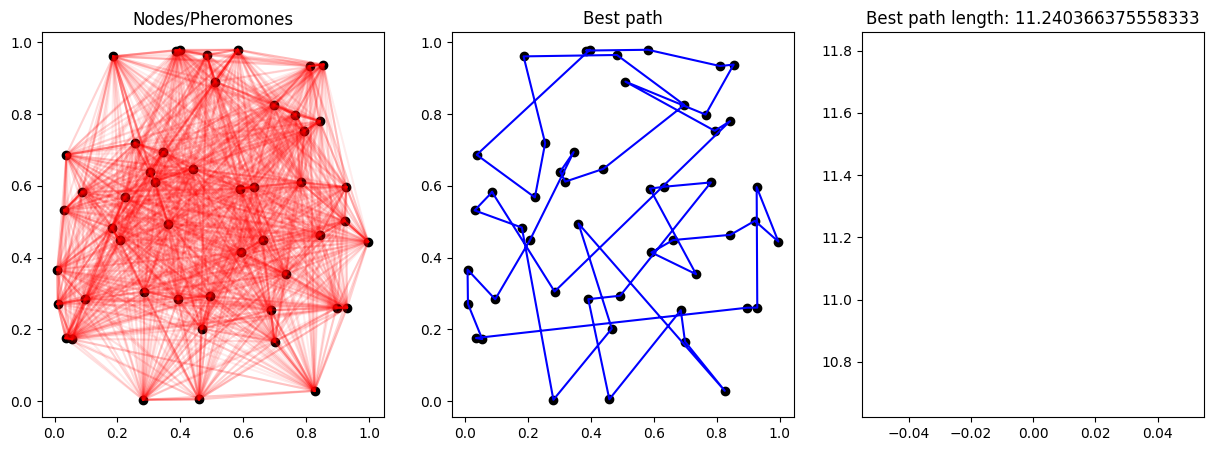

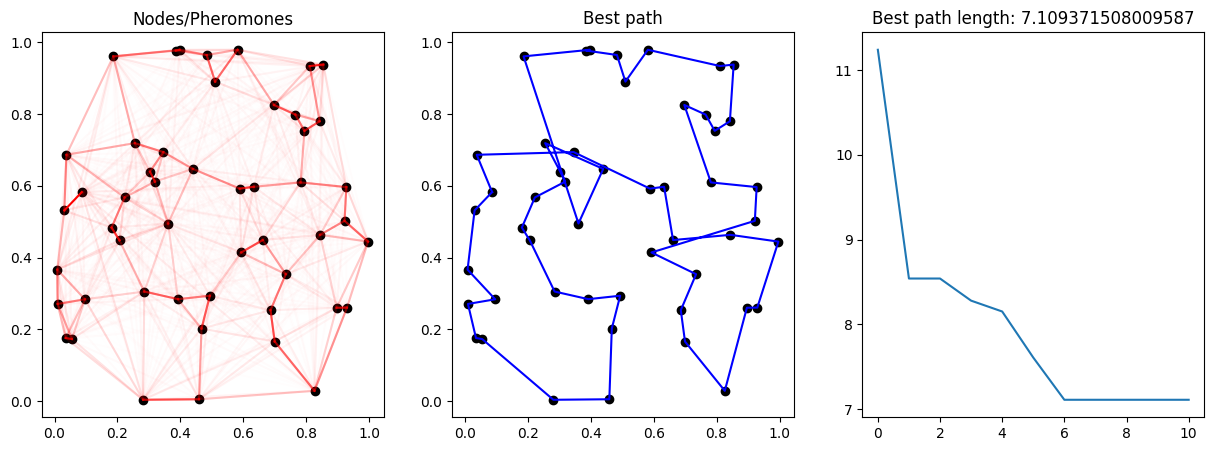

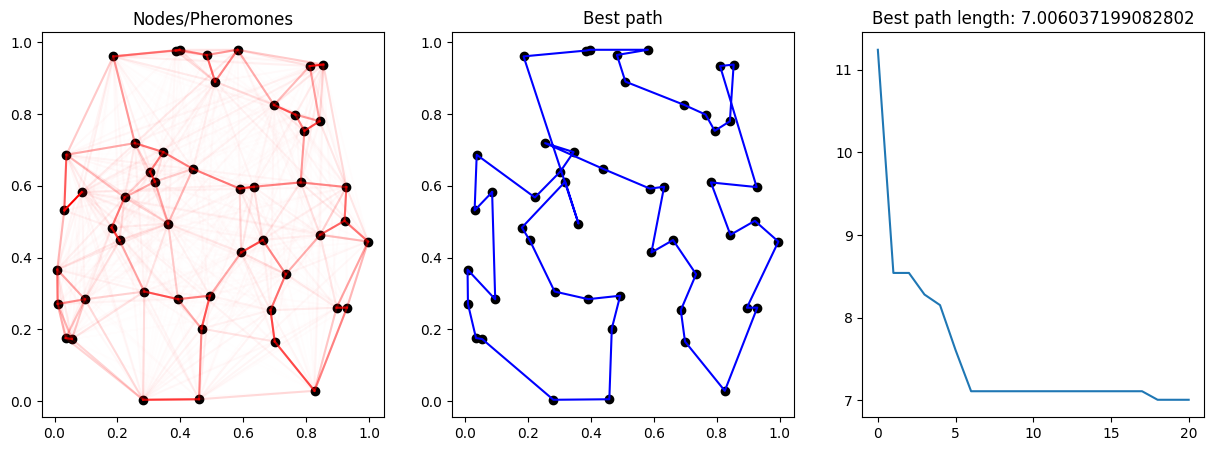

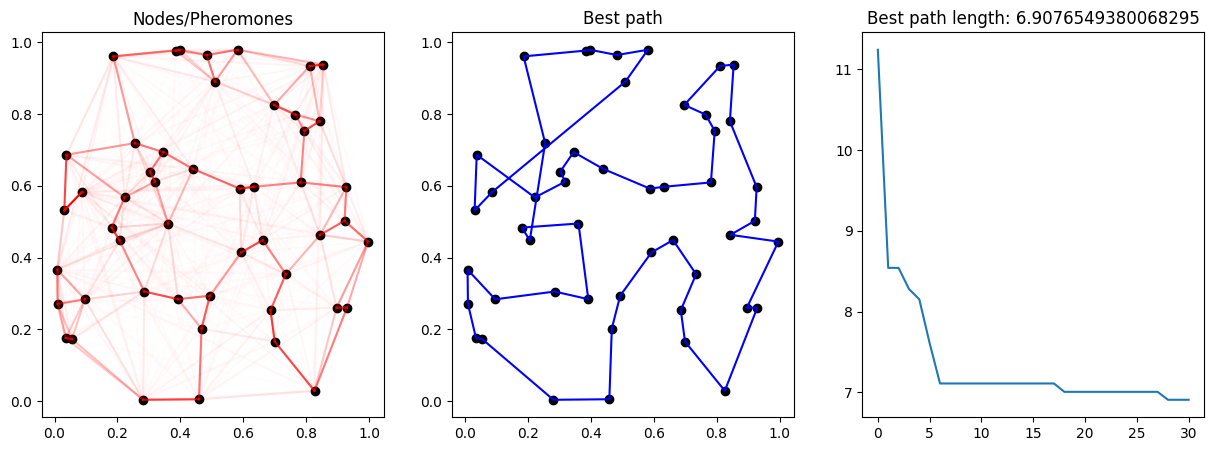

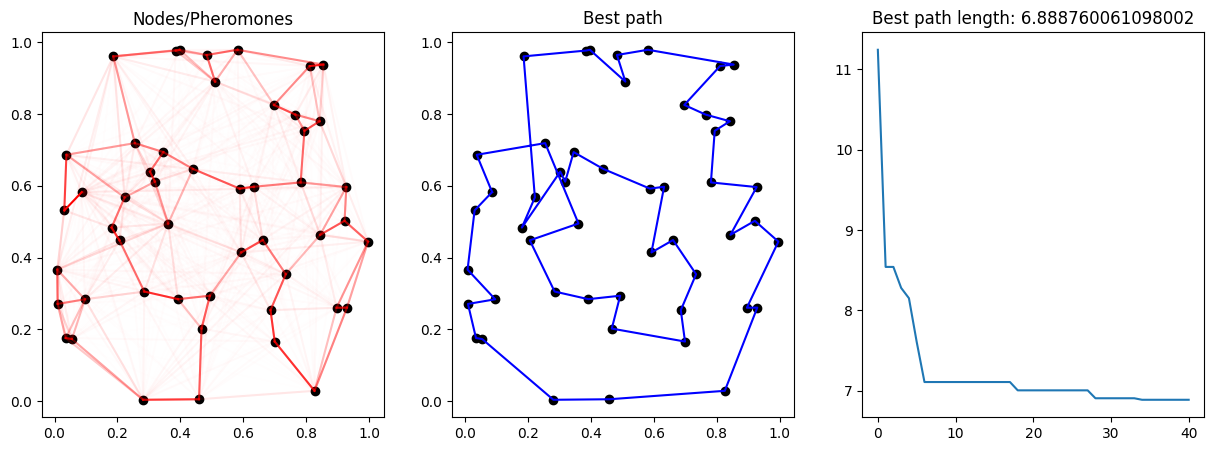

In [96]:
n_nodes = 50
x = np.random.rand(n_nodes)
y = np.random.rand(n_nodes)
distance = np.zeros((n_nodes, n_nodes))
for i in range(n_nodes):
    for j in range(n_nodes):
        distance[i, j] = np.hypot(x[i] - x[j], y[i] - y[j])
n_nodes = distance.shape[0]
ant_colony = AntColony(n_ants=30, n_nodes=n_nodes, n_iterations=50, alpha=1.0, beta=2.0, rho=0.2, x=x, y=y, show=True)
best_path, best_path_length, best_path_history = ant_colony.solve(distance)